In [1]:
%config Completer.use_jedi = False

# LoL Champions Data Analysis
This notbook conducts quantitative analyses on LoL champion statistics, using [Data Dragon](http://ddragon.leagueoflegends.com/cdn/9.3.1/data/en_US/champion.json)

In [25]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [24]:
versions_url = "https://ddragon.leagueoflegends.com/api/versions.json"
versions = requests.get(versions_url)
version = versions.json()[0]
prev_version = versions.json()[1]

In [83]:
champs_url = "http://ddragon.leagueoflegends.com/cdn/" + version + "/data/en_US/champion.json"
champs = requests.get(champs_url).json()

champs_data = pd.DataFrame(champs['data'])
champs_data
cols = list(champs_data['Aatrox']['stats'].keys())

['hp',
 'hpperlevel',
 'mp',
 'mpperlevel',
 'movespeed',
 'armor',
 'armorperlevel',
 'spellblock',
 'spellblockperlevel',
 'attackrange',
 'hpregen',
 'hpregenperlevel',
 'mpregen',
 'mpregenperlevel',
 'crit',
 'critperlevel',
 'attackdamage',
 'attackdamageperlevel',
 'attackspeedperlevel',
 'attackspeed']

In [85]:
champ_names = champs_data.columns.values.tolist()
row_names = champ_names
rows = []
for name in row_names:
    row = []
    for stat in cols:
        row.append(champs_data[name]['stats'][stat])
    rows.append(row)
champ_stats = pd.DataFrame(rows, columns = cols, index = champ_names)
champ_stats

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
Aatrox,580.0,90,0.0,0.0,345,38,3.25,32.0,1.25,175,3.00,1.00,0.000,0.00,0,0,60.0,5.00,2.500,0.651
Ahri,500.0,82,418.0,25.0,330,18,3.50,30.0,0.50,550,2.50,0.60,8.000,0.80,0,0,53.0,3.00,2.000,0.668
Akali,500.0,105,200.0,0.0,345,23,3.50,37.0,1.25,125,9.00,0.90,50.000,0.00,0,0,62.0,3.30,3.200,0.625
Akshan,560.0,90,350.0,40.0,330,26,3.00,30.0,0.50,500,3.75,0.65,8.175,0.70,0,0,52.0,3.50,4.000,0.638
Alistar,600.0,106,350.0,40.0,330,44,3.50,32.0,1.25,125,8.50,0.85,8.500,0.80,0,0,62.0,3.75,2.125,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeri,500.0,85,250.0,45.0,325,23,3.50,30.0,0.50,500,3.25,0.55,6.000,0.80,0,0,58.0,2.00,2.000,0.658
Ziggs,536.0,92,480.0,23.5,325,22,3.30,30.0,0.50,550,6.50,0.60,8.000,0.80,0,0,54.0,3.10,2.000,0.656
Zilean,504.0,82,452.0,50.0,335,24,3.80,30.0,0.50,550,5.50,0.50,11.340,0.80,0,0,52.0,3.00,2.130,0.625
Zoe,560.0,92,425.0,25.0,340,21,3.50,30.0,0.50,550,6.50,0.60,8.000,0.65,0,0,58.0,3.30,2.500,0.625


Now the champ_stats dataframe is ready. Each row in the dataframe are the champion names, and each columns corresponds to champion stats.

In [104]:
champ_stats['effective_p_health'] = (1 + champ_stats['armor'] / 100) * champ_stats['hp']
champ_stats['effective_m_health'] = (1 + champ_stats['spellblock'] / 100) * champ_stats['hp']
champ_stats['effective_overall'] = (champ_stats['effective_p_health'] + 

weakest_ar = champ_stats.sort_values(by = 'effective_p_health')[:20]
weakest_ar['effective_p_health']

Kled            459.00
Heimerdinger    580.72
Anivia          580.80
Lux             583.10
Ahri            590.00
Seraphine       595.00
Yuumi           600.00
Malzahar        601.80
Sona            604.80
Veigar          611.05
Akali           615.00
Zeri            615.00
Orianna         620.10
Annie           623.56
Zilean          624.96
Nami            632.10
Vayne           633.45
Brand           634.40
Velkoz          634.40
Yasuo           637.00
Name: effective_p_health, dtype: float64

In [105]:
weakest_mr = champ_stats.sort_values(by = 'effective_m_health')[:20]
weakest_mr['effective_m_health']

Kled            435.2
Yuumi           600.0
Anivia          624.0
Sona            624.0
Heimerdinger    634.4
Nami            637.0
Lux             637.0
Yasuo           646.8
Ahri            650.0
Zeri            650.0
Seraphine       650.0
Janna           650.0
Zilean          655.2
Zyra            655.2
Caitlyn         663.0
Gnar            663.0
Malzahar        663.0
Irelia          665.6
Vex             665.6
Veigar          666.6
Name: effective_m_health, dtype: float64

In [107]:
weakest_total = champ_stats.sort_values(by = 'effective_overall')[:20]
weakest_total['effective_overall']

Kled            447.100
Yuumi           600.000
Anivia          602.400
Heimerdinger    607.560
Lux             610.050
Sona            614.400
Ahri            620.000
Seraphine       622.500
Malzahar        632.400
Zeri            632.500
Nami            634.550
Veigar          638.825
Zilean          640.080
Yasuo           641.900
Orianna         643.950
Janna           645.000
Akali           650.000
Vayne           651.475
Annie           652.380
Vex             652.600
Name: effective_overall, dtype: float64

In [123]:
strongest_ar = champ_stats.sort_values(by = 'effective_p_health')[-20:]
strongest_ar['effective_p_health']

Rumble        801.04
Taric         805.00
Yorick        806.20
Jax           806.48
Kayn          807.30
Nocturne      807.30
Darius        808.98
TahmKench     809.40
Pantheon      812.00
Blitzcrank    816.20
Zac           817.95
Gwen          820.10
Shyvana       821.10
Gragas        828.00
Tryndamere    832.58
Garen         843.20
Trundle       843.92
Leona         846.72
Alistar       864.00
Pyke          870.00
Name: effective_p_health, dtype: float64

In [124]:
strongest_mr = champ_stats.sort_values(by = 'effective_m_health')[-20:]
strongest_mr['effective_m_health']

Kaisa         780.00
Ryze          782.00
Jax           782.76
Udyr          784.08
Shyvana       785.40
Draven        786.50
MasterYi      790.68
Alistar       792.00
Pyke          792.00
Gragas        792.00
Sett          792.00
Jinx          793.00
Katarina      794.64
Twitch        795.60
Zac           811.80
Amumu         811.80
Trundle       813.12
Talon         817.32
Garen         818.40
Tryndamere    826.32
Name: effective_m_health, dtype: float64

In [125]:
strongest_total = champ_stats.sort_values(by = 'effective_overall')[-20:]
strongest_total['effective_overall']

Darius        788.610
Nocturne      789.750
Kayn          789.750
Udyr          790.020
Talon         790.860
Blitzcrank    792.880
MasterYi      793.675
Jax           794.620
Sett          795.000
Gwen          799.450
Shyvana       803.250
Leona         803.520
Amumu         805.650
Gragas        810.000
Zac           814.875
Alistar       828.000
Trundle       828.520
Tryndamere    829.450
Garen         830.800
Pyke          831.000
Name: effective_overall, dtype: float64

In [135]:
# Create ranked list of effective HP's 
cols = ["HP against physical dmg", "HP against magic dmg", "Average"]
rows = []
rows.append(strongest_ar.index.values)
rows.append(strongest_mr.index.values)
rows.append(strongest_total.index.values)
champ_ranks = pd.DataFrame(rows).transpose()
champ_ranks.rename(columns = {0 : "HP against physical dmg", 1 : "HP against magic dmg", 2 : "Average"})

,HP against physical dmg,HP against magic dmg,Average
0,Rumble,Kaisa,Darius
1,Taric,Ryze,Nocturne
2,Yorick,Jax,Kayn
3,Jax,Udyr,Udyr
4,Kayn,Shyvana,Talon
5,Nocturne,Draven,Blitzcrank
6,Darius,MasterYi,MasterYi
7,TahmKench,Alistar,Jax
8,Pantheon,Pyke,Sett
9,Blitzcrank,Gragas,Gwen


In [137]:
import seaborn as sns

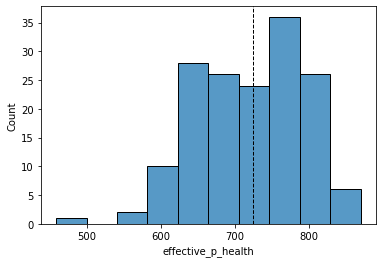

In [155]:
sns.histplot(data = champ_stats["effective_p_health"])
plt.axvline(champ_stats.median()["effective_p_health"], color='black', linestyle='dashed', linewidth=1)

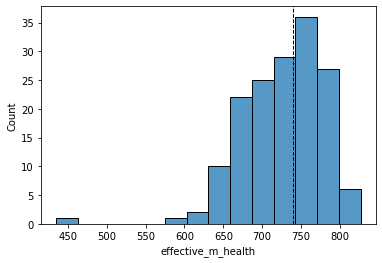

In [154]:
sns.histplot(data = champ_stats["effective_m_health"])
plt.axvline(champ_stats.median()["effective_m_health"], color='black', linestyle='dashed', linewidth=1)

In [ ]:
champs

In [151]:
champ_stats.median()

hp                      560.0000
hpperlevel               90.0000
mp                      330.0000
mpperlevel               40.0000
movespeed               335.0000
armor                    29.0000
armorperlevel             3.5000
spellblock               32.0000
spellblockperlevel        0.7500
attackrange             175.0000
hpregen                   6.5000
hpregenperlevel           0.6000
mpregen                   7.5900
mpregenperlevel           0.6000
crit                      0.0000
critperlevel              0.0000
attackdamage             60.0000
attackdamageperlevel      3.1416
attackspeedperlevel       2.5000
attackspeed               0.6440
effective_p_health      725.4000
effective_m_health      739.2000
effective_overall       729.6000
dtype: float64

In [153]:
import matplotlib.pyplot as plt

Using the median starting specs, let's see the efficiency of armor and health items. Armor stats will be based off of cloth armor (300G, +15 armor) and health stats will be based off of ruby crystal (400G, +150 HP)

In [162]:
# Armor vs. Health
# champ_stats['effective_p_health'] = (1 + champ_stats['armor'] / 100) * champ_stats['hp']
medians = champ_stats.median()
base_hp = medians["hp"]
base_hp_scale = medians["hpperlevel"]
base_armor = medians['armor']
base_armor_scale = medians['armorperlevel']

rows = []
for lvl in range(0, 18):
    row = []
    ar = base_armor + lvl * base_armor_scale
    hp = base_hp + lvl * base_hp_scale
    # Ruby crystal sv. cloth armor comparison
    comp1 = ((1 + (ar + 15)/ 100) * hp) < ((1 + ar / 100) * (hp + 150))
                                           
    # Price - ratio comparison ()
    comp2 = ((1 + (ar + 18)/ 100) * hp) < ((1 + ar / 100) * (hp + 135))       
    row = [hp, ar, comp1, comp2]
    rows.append(row)

rows = pd.DataFrame(rows, columns = ["HP", "Armor", "Ruby Crystal wins Cloth Armor?", "Health wins armor?"])
rows                            
                                           

,HP,Armor,Ruby Crystal wins Cloth Armor?,Health wins armor?
0,560.0,29.0,True,True
1,650.0,32.5,True,True
2,740.0,36.0,True,True
3,830.0,39.5,True,True
4,920.0,43.0,True,True
5,1010.0,46.5,True,True
6,1100.0,50.0,True,True
7,1190.0,53.5,True,False
8,1280.0,57.0,True,False
9,1370.0,60.5,True,False


Similarly, we compare the Null-magic mantle (450G, +25MR) to a Ruby Crystal (400G, +150 HP), in terms of both item-item comparison and price-ratio comparison

In [166]:
# MR vs. Health
# champ_stats['effective_p_health'] = (1 + champ_stats['armor'] / 100) * champ_stats['hp']

rows = []
for lvl in range(0, 18):
    row = []
    mr = base_mr + lvl * base_mr_scale
    hp = base_hp + lvl * base_hp_scale
    # Ruby crystal sv. Null-magic mantle comparison
    comp1 = ((1 + (mr + 25)/ 100) * hp) < ((1 + mr / 100) * (hp + 150))
                                           
    # Price - ratio comparison ()
    comp2 = ((1 + (mr + 20)/ 100) * hp) < ((1 + mr / 100) * (hp + 135))       
    row = [hp, mr, comp1, comp2]
    rows.append(row)

rows = pd.DataFrame(rows, columns = ["HP", "MR", "Ruby Crystal wins NMM?", "Health wins MR?"])
rows 

,HP,MR,Ruby Crystal wins NMM?,Health wins MR?
0,560.0,32.00,True,True
1,650.0,32.75,True,True
2,740.0,33.50,True,True
3,830.0,34.25,False,True
4,920.0,35.00,False,False
5,1010.0,35.75,False,False
6,1100.0,36.50,False,False
7,1190.0,37.25,False,False
8,1280.0,38.00,False,False
9,1370.0,38.75,False,False


In [179]:
# Item to item comparison : Randuin's Omen (80 armor, 250 hp) vs Thornmail (60 armor, 350 hp)

base_mr = medians['spellblock']
base_mr_scale = medians['spellblockperlevel']

rows = []
for lvl in range(0, 18):
    row = []
    ar = base_armor + lvl * base_armor_scale
    hp = base_hp + lvl * base_hp_scale
    EH = (1 + ar / 100) * hp
    # Randuin's Omen vs. Thornmail comparison
    comp1 = ((1 + (ar + 80)/ 100) * (hp + 250)) < ((1 + (ar + 60) / 100) * (hp + 350))
    
    # Raduin's effective heatlh
    R_EH = (1 + (ar + 80)/ 100) * (hp + 250)
    R_EH_inc = R_EH - EH
    
    # Thornmail effective health
    T_EH = (1 + (ar + 60) / 100) * (hp + 350)
    T_EH_inc = T_EH - EH
    
    p_diff = (R_EH - T_EH) / T_EH * 100
    
    row = [hp, ar, comp1, R_EH_inc, T_EH_inc, p_diff]
    rows.append(row)

rows = pd.DataFrame(rows, columns = ["HP", "Armor", "Thronmail wins Randuins?", "EH increase from Randuin's", "EH increase from Thornmail", "p_diff"])
rows                               

,HP,Armor,Thronmail wins Randuins?,EH increase from Randuin's,EH increase from Thornmail,p_diff
0,560.0,29.0,True,970.50,997.50,-1.569859
1,650.0,32.5,True,1051.25,1063.75,-0.649351
2,740.0,36.0,False,1132.00,1130.00,0.093615
3,830.0,39.5,False,1212.75,1196.25,0.700905
4,920.0,43.0,False,1293.50,1262.50,1.202436
5,1010.0,46.5,False,1374.25,1328.75,1.620140
6,1100.0,50.0,False,1455.00,1395.00,1.970443
7,1190.0,53.5,False,1535.75,1461.25,2.265884
8,1280.0,57.0,False,1616.50,1527.50,2.516186
9,1370.0,60.5,False,1697.25,1593.75,2.728999


In terms of base specs only (excluding unique effects), Randuin's Omen is the clear winner against Thornmail, although the difference does not appear to be so significant (~3%)

In [180]:
# 5 Randuins vs. 5 Thornmail?

rows = []
for lvl in range(0, 18):
    row = []
    ar = base_armor + lvl * base_armor_scale
    hp = base_hp + lvl * base_hp_scale
    EH = (1 + ar / 100) * hp
    # Randuin's Omen vs. Thornmail comparison
    comp1 = ((1 + (ar + 80*5)/ 100) * (hp + 250*5)) < ((1 + (ar + 60*5) / 100) * (hp + 350*5))
    
    # Raduin's effective heatlh
    R_EH = (1 + (ar + 80*5)/ 100) * (hp + 250*5)
    R_EH_inc = R_EH - EH
    
    # Thornmail effective health
    T_EH = (1 + (ar + 60*5) / 100) * (hp + 350*5)
    T_EH_inc = T_EH - EH
    
    p_diff = (R_EH - T_EH) / T_EH * 100
    
    row = [hp, ar, comp1, R_EH_inc, T_EH_inc, p_diff]
    rows.append(row)

rows = pd.DataFrame(rows, columns = ["HP", "Armor", "Thronmail wins Randuins?", "EH increase from Randuin's", "EH increase from Thornmail", "p_diff"])
rows                               

,HP,Armor,Thronmail wins Randuins?,EH increase from Randuin's,EH increase from Thornmail,p_diff
0,560.0,29.0,True,8852.50,9187.50,-3.380458
1,650.0,32.5,True,9256.25,9518.75,-2.528902
2,740.0,36.0,True,9660.00,9850.00,-1.750120
3,830.0,39.5,True,10063.75,10181.25,-1.036237
4,920.0,43.0,True,10467.50,10512.50,-0.380450
5,1010.0,46.5,False,10871.25,10843.75,0.223153
6,1100.0,50.0,False,11275.00,11175.00,0.779727
7,1190.0,53.5,False,11678.75,11506.25,1.293792
8,1280.0,57.0,False,12082.50,11837.50,1.769324
9,1370.0,60.5,False,12486.25,12168.75,2.209833


Against my expectation, the difference in specs stayed about the same when the item's purchased five times. 

<AxesSubplot:>

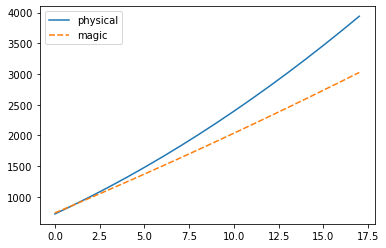

In [177]:
# Effective health by level
rows = []
for lvl in range(0, 18):
    row = []
    ar = base_armor + lvl * base_armor_scale
    mr = base_mr + lvl * base_mr_scale
    hp = base_hp + lvl * base_hp_scale
    AR_EH = (1 + ar / 100) * hp
    MR_EH = (1 + mr / 100) * hp
    
    row = [AR_EH, MR_EH]
    rows.append(row)
    
df = pd.DataFrame(rows, columns = ["physical", "magic"])
df
sns.lineplot(data = df)

Both the HP against physical and magic dmg appear to be quasi-linear.